### Импорт библиотек

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import os

### Визуализация данных

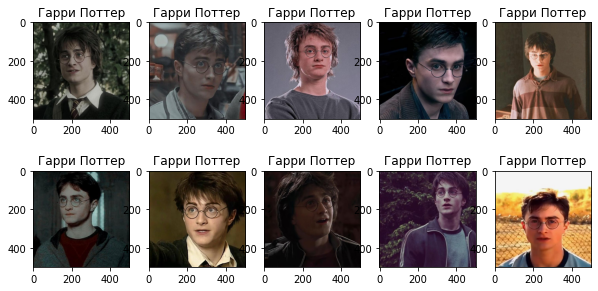

In [2]:
k = os.listdir('Гарри Поттер и Драко Малфой /Гарри Поттер')
plt.figure(figsize=(10, 5))
for i in range(10):
    img = image.load_img(f'Гарри Поттер и Драко Малфой /Гарри Поттер/{k[i]}')
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title('Гарри Поттер')

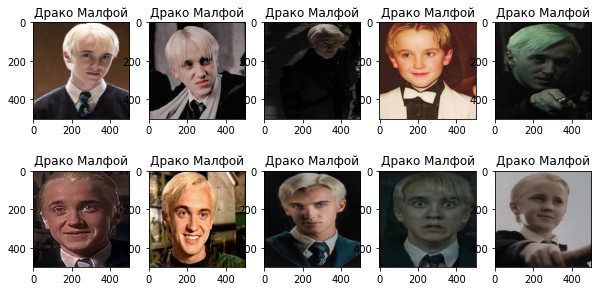

In [3]:
k = os.listdir('Гарри Поттер и Драко Малфой /Драко Малфой/')
plt.figure(figsize=(10, 5))
for i in range(10):
    img = image.load_img(f'Гарри Поттер и Драко Малфой /Драко Малфой/{k[i]}')
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title('Драко Малфой')

### Подготовка данных

In [4]:
train = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory('Гарри Поттер и Драко Малфой /',
                                         target_size=(500, 500),
                                         batch_size= 10,
                                         class_mode='binary')

Found 500 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'Гарри Поттер': 0, 'Драко Малфой': 1}

#### Функция для подготовки данных confusion_metrix

In [7]:
def prepare(model, dataset):
    y_pred = []
    for i in os.listdir('Гарри Поттер и Драко Малфой /Гарри Поттер'):
        img = image.load_img('Гарри Поттер и Драко Малфой /Гарри Поттер/' + i)
        img = img.resize((500, 500))
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        val = model.predict(X)
        y_pred.append(val[0][0])
    for i in os.listdir('Гарри Поттер и Драко Малфой /Драко Малфой'):
        img = image.load_img('Гарри Поттер и Драко Малфой /Драко Малфой/' + i)
        img = img.resize((500, 500))
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        val = model.predict(X)
        y_pred.append(val[0][0])
    y_pred = np.array(y_pred, dtype = np.int0)
    y_true = dataset.classes
    return y_pred, y_true

### Обучени моделей

In [8]:
model1 = Sequential()

model1.add(Conv2D(3,(3,3), input_shape=(500,500,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#
model1.add(Conv2D(9,(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#
model1.add(Dropout(0.12))
#
model1.add(Conv2D(18,(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Flatten())
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 3)       84        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 3)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 9)       252       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 9)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 123, 123, 9)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 18)      1

In [10]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model1.fit(train_dataset, epochs=20)

Epoch 1/20
50/50 [==============================] - 12s 235ms/step - loss: 0.5611 - accuracy: 0.7480
Epoch 2/20
50/50 [==============================] - 12s 232ms/step - loss: 0.3134 - accuracy: 0.8840
Epoch 3/20
50/50 [==============================] - 12s 232ms/step - loss: 0.2290 - accuracy: 0.9180
Epoch 4/20
50/50 [==============================] - 12s 236ms/step - loss: 0.1842 - accuracy: 0.9380
Epoch 5/20
50/50 [==============================] - 12s 237ms/step - loss: 0.0815 - accuracy: 0.9780
Epoch 6/20
50/50 [==============================] - 12s 238ms/step - loss: 0.0620 - accuracy: 0.9860
Epoch 7/20
50/50 [==============================] - 12s 238ms/step - loss: 0.0432 - accuracy: 0.9940
Epoch 8/20
50/50 [==============================] - 12s 239ms/step - loss: 0.0133 - accuracy: 0.9980
Epoch 9/20
50/50 [==============================] - 12s 237ms/step - loss: 0.0241 - accuracy: 0.9920
Epoch 10/20
50/50 [==============================] - 12s 244ms/step - loss: 0.0382 - accura

KeyboardInterrupt: 

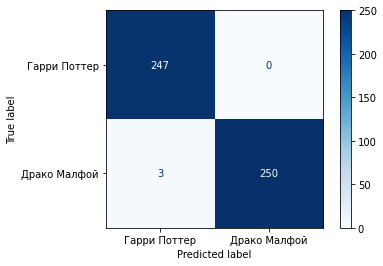

In [12]:
labels = ['Гарри Поттер', 'Драко Малфой']
y_true, y_pred = prepare(model1, train_dataset)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
model1.save('Harry_poter_model_1/')

INFO:tensorflow:Assets written to: Harry_poter_model_1/assets


#### Модель 2

In [14]:
model2 = Sequential()

model2.add(Conv2D(3,(3,3), input_shape=(500,500,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#
model2.add(Conv2D(6,(3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#
model2.add(Conv2D(9,(3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#
model2.add(Conv2D(12,(3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#
model2.add(Conv2D(18,(3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#
model2.add(Flatten())
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 498, 498, 3)       84        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 249, 249, 3)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 247, 247, 6)       168       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 123, 123, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 121, 121, 9)       495       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 60, 9)       

In [16]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model2.fit(train_dataset, epochs=20)

Epoch 1/20
50/50 [==============================] - 11s 211ms/step - loss: 0.5675 - accuracy: 0.7120
Epoch 2/20
50/50 [==============================] - 11s 213ms/step - loss: 0.3155 - accuracy: 0.8840
Epoch 3/20
50/50 [==============================] - 11s 214ms/step - loss: 0.2777 - accuracy: 0.8920
Epoch 4/20
50/50 [==============================] - 11s 219ms/step - loss: 0.2370 - accuracy: 0.9140
Epoch 5/20
50/50 [==============================] - 11s 217ms/step - loss: 0.1883 - accuracy: 0.9220
Epoch 6/20
50/50 [==============================] - 11s 221ms/step - loss: 0.2019 - accuracy: 0.9220
Epoch 7/20
50/50 [==============================] - 11s 223ms/step - loss: 0.1593 - accuracy: 0.9500
Epoch 8/20
50/50 [==============================] - 11s 222ms/step - loss: 0.1030 - accuracy: 0.9640
Epoch 9/20
50/50 [==============================] - 11s 220ms/step - loss: 0.0812 - accuracy: 0.9800
Epoch 10/20
50/50 [==============================] - 12s 230ms/step - loss: 0.0726 - accura

KeyboardInterrupt: 

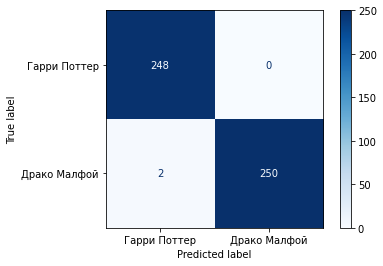

In [18]:
labels = ['Гарри Поттер', 'Драко Малфой']
y_true, y_pred = prepare(model2, train_dataset)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
model1.save('Harry_poter_model_2')

INFO:tensorflow:Assets written to: Harry_poter_model_2/assets


#### Модель 3

In [25]:
model3 = Sequential()

model3.add(Conv2D(3,(3,3), input_shape=(500,500,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
#
model3.add(Conv2D(6,(3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
#
model3.add(Conv2D(9,(3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
#
model3.add(Conv2D(12,(3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
#
model3.add(Conv2D(18,(3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
#
model3.add(Flatten())
model3.add(Dense(units=16, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))

In [26]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 498, 498, 3)       84        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 249, 249, 3)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 247, 247, 6)       168       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 123, 123, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 121, 121, 9)       495       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 60, 60, 9)       

In [27]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model3.fit(train_dataset, epochs=20)

Epoch 1/20
50/50 [==============================] - 11s 210ms/step - loss: 0.6153 - accuracy: 0.6780
Epoch 2/20
50/50 [==============================] - 11s 213ms/step - loss: 0.3921 - accuracy: 0.8440
Epoch 3/20
50/50 [==============================] - 11s 216ms/step - loss: 0.2652 - accuracy: 0.8940
Epoch 4/20
50/50 [==============================] - 11s 222ms/step - loss: 0.2442 - accuracy: 0.9040
Epoch 5/20
50/50 [==============================] - 11s 220ms/step - loss: 0.1859 - accuracy: 0.9340
Epoch 6/20
50/50 [==============================] - 11s 218ms/step - loss: 0.1389 - accuracy: 0.9460
Epoch 7/20
50/50 [==============================] - 11s 219ms/step - loss: 0.1532 - accuracy: 0.9460
Epoch 8/20
50/50 [==============================] - 11s 218ms/step - loss: 0.0936 - accuracy: 0.9680
Epoch 9/20
50/50 [==============================] - 11s 219ms/step - loss: 0.0841 - accuracy: 0.9700
Epoch 10/20
50/50 [==============================] - 13s 254ms/step - loss: 0.0419 - accura

KeyboardInterrupt: 

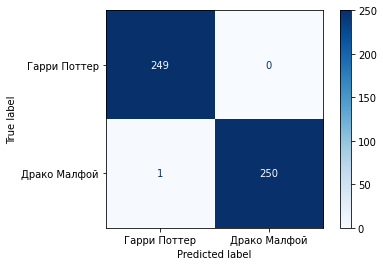

In [29]:
labels = ['Гарри Поттер', 'Драко Малфой']
y_true, y_pred = prepare(model3, train_dataset)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
model1.save('Harry_poter_model_3')

INFO:tensorflow:Assets written to: Harry_poter_model_3/assets


### Тестирование на новых данных

In [ ]:
from tkinter import filedialog as fd
filename = fd.askopenfilename()
img = image.load_img(filename)
img = img.resize((500, 500))
plt.imshow(img)
plt.show()   
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
   
val1 = model1.predict(X)
if val1 == 0:
    print('Модель 1: Гарри Поттер')
elif val1 == 1:
    print('Модель 1: Драко Малфой')
    
val2 = model2.predict(X)
if val2 == 0:
    print('Модель 2: Гарри Поттер')
elif val2 == 1:
    print('Модель 2: Драко Малфой')
    

val = model3.predict(X)
if val == 0:
    print('Модель 3: Драко малфой')
elif val == 1:
    print('Модель 3: Гарри Поттер')
print(filename)

##### Вывод

* Модели показывают себя достойно даже с учётом специфичности данных. При нескольких некоторых прогонах обучения модель может выдавать плохой результат. Дополнительно у ipunb прикреплены сохранённые модели. Лучше всего на новых данных себя себя показала модель 2.